# Plot the haeatmaps for comparison study of STUDY1 and STUDY2

In [2]:
# import the neccessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [1]:
def generate_matrix_by_metrics(metric,pathsArr,target):
    metric_scores=[]
    for path in pathsArr:
        df=pd.read_csv(path)
        if('Features' in df.columns and '#Features' in df.columns):
            df=df.drop(['Features','#Features'],axis=1)
        df = df[df['Algorithm']!='Linear Regression SGD']
        values = df[df['Target']==target].sort_values(by='Algorithm')[metric].values
        metric_scores.append(values)
    del df
    return np.round(metric_scores,2)

In [3]:
def generate_heatmap_forall(pathsArr,target,methods,models):
    '''Function which returns the plot for every axes passed'''
    r2_val=generate_matrix_by_metrics('R2(Validation)',pathsArr,target)
    r2_train=generate_matrix_by_metrics('R2(Train)',pathsArr,target)
    r2_test = generate_matrix_by_metrics('R2(Test)',pathsArr,target)
    rmse_val = generate_matrix_by_metrics('RMSE(Validation)',pathsArr,target)
    adjusted_r2= generate_matrix_by_metrics('Adjusted R2(Validation)',pathsArr,target)
    predictions = generate_matrix_by_metrics('R2(Test)',pathsArr,target)
    mae_val = generate_matrix_by_metrics('MAE(Validation)',pathsArr,target)
    std_val = generate_matrix_by_metrics('StandardError(Validation)',pathsArr,target)

    '''Visualization for the different metrics'''

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    i=0
    j=0
    
    fig,axes = plt.subplots(1,4,figsize=(27,10),sharey=True)
    
    # Plotting RMSE
    im = axes[0].imshow(rmse_val,cmap="RdBu_r",vmin=1, vmax=1.5)
    axes[0].set_xticks(np.arange(len(models)))
    axes[0].set_yticks(np.arange(len(methods)))
    axes[0].set_xticklabels(models)
    axes[0].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[0])
    plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[0].text(j, i, rmse_val[i, j],
                           ha="center", va="center", color="black",weight='bold')
    axes[0].set_title("Root Mean Squared Error(RMSE)",weight='bold')
    
    # Plotting MAE
    im = axes[1].imshow(mae_val,cmap="RdBu_r",vmin=0.8, vmax=1.2)
    axes[1].set_xticks(np.arange(len(models)))
    axes[1].set_yticks(np.arange(len(methods)))
    # ... and label them with the respective list entries
    axes[1].set_xticklabels(models)
    axes[1].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[1])
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[1].text(j, i, mae_val[i, j],
                           ha="center", va="center", color="black",weight='bold')
    axes[1].set_title("Mean Absolute Error(MAE)",weight='bold')
    
    # Plotting Adjusted R2
    i=0
    j=0
    im = axes[2].imshow(adjusted_r2,cmap="RdBu_r",vmin=0, vmax=.6)
    axes[2].set_xticks(np.arange(len(models)))
    axes[2].set_yticks(np.arange(len(methods)))
    # ... and label them with the respective list entries
    axes[2].set_xticklabels(models)
    axes[2].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[2])
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[2].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[2].text(j, i, adjusted_r2[i, j],
                           ha="center", va="center", color="black",weight='bold')
    axes[2].set_title("Adjusted-$R^2$",weight='bold')


    # Plotting R2
    im = axes[3].imshow(r2_val,cmap="RdBu_r",vmin=0, vmax=.60)
    axes[3].set_xticks(np.arange(len(models)))
    axes[3].set_yticks(np.arange(len(methods)))
    # ... and label them with the respective list entries
    axes[3].set_xticklabels(models)
    axes[3].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[3])
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[3].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[3].text(j, i, '{}\n(+/-{})'.format(r2_val[i, j],std_val[i, j]),
                           ha="center", va="center", color="black",weight='bold')
    axes[3].set_title("Mean Cross validation scores $(R^2)$",weight='bold')
    
    
    fig.tight_layout()
    title='Comparison of different ML techniques for predicting '+target
    fig.suptitle(title,y=1.1,fontsize=20, weight='bold')
    plt.show()

# 1. STUDY1


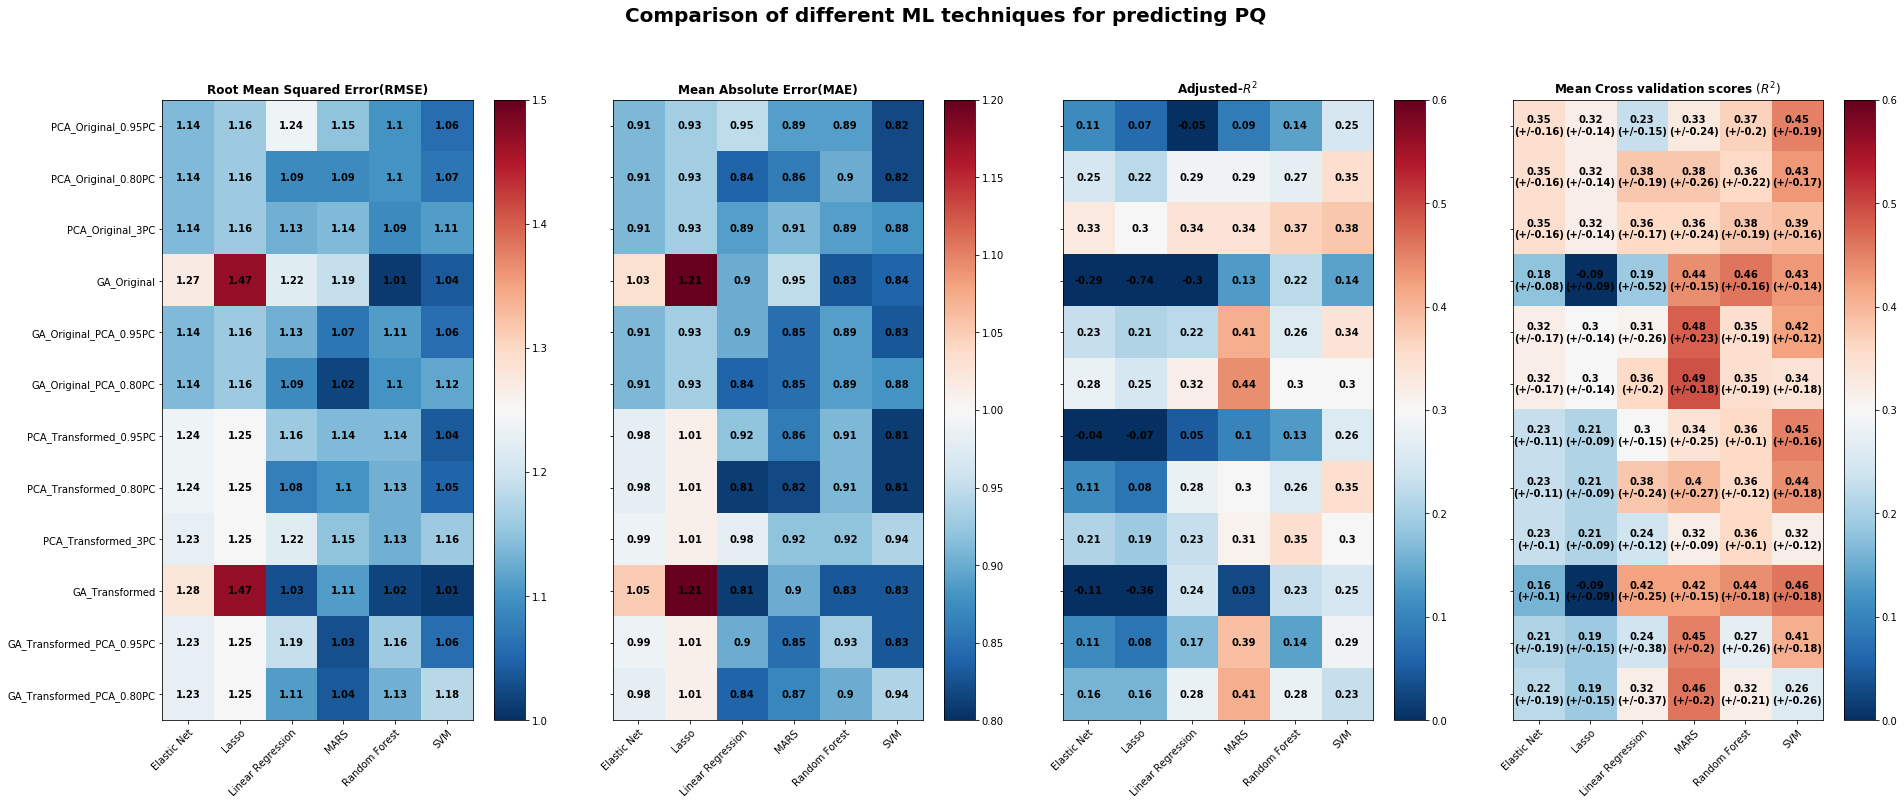

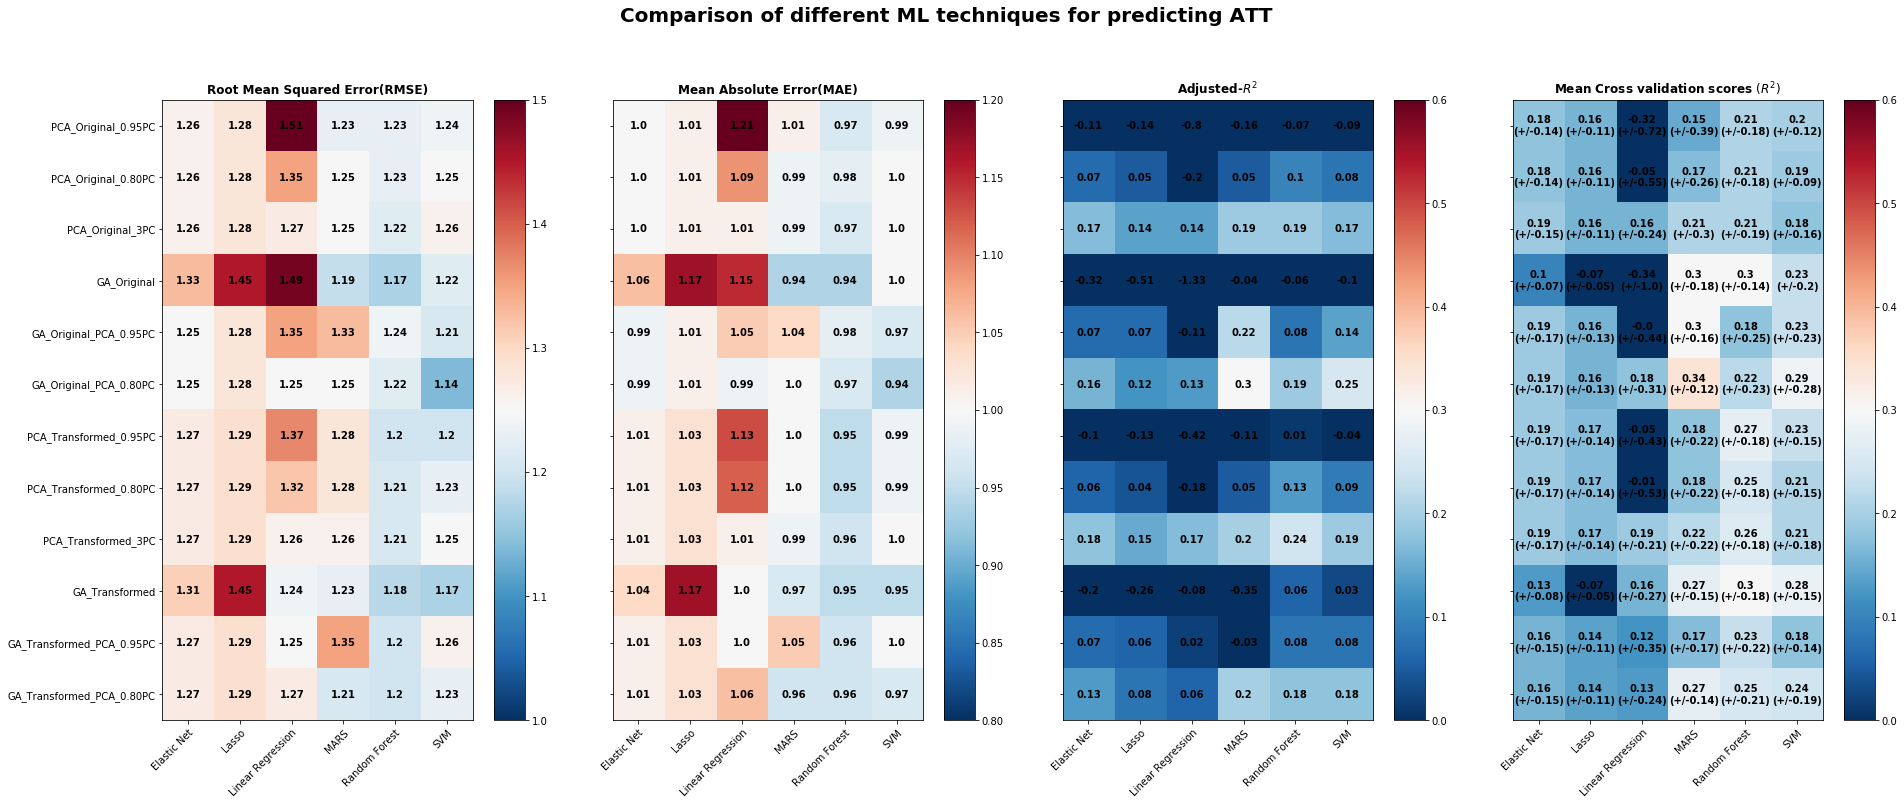

In [6]:
pathsArr=[
'study1_PCA_alltargets_mahalanobis_0.95PC.csv',
    'study1_PCA_alltargets_mahalanobis_0.80PC.csv',
    'study1_PCA_alltargets_mahalanobis_3PC.csv',
        
    'study1_feature_selection_mahalanobis_alltargets.csv',
    'study1_feature_selection_mahalanobis_alltargets_PCA_0.95PC.csv',
         'study1_feature_selection_mahalanobis_alltargets_PCA_0.80PC.csv',
    
    'study1_PCA_alltargets_mahalanobis_transformed_0.95PC.csv',
    'study1_PCA_alltargets_mahalanobis_transformed_0.80PC.csv',
         'study1_PCA_alltargets_mahalanobis_transformed_3PC.csv',  
    
    'study1_feature_selection_mahalanobis_transformed_alltargets.csv',
    'study1_feature_selection_mahalanobis_transformed_alltargets_PCA_0.95PC.csv',
         'study1_feature_selection_mahalanobis_transformed_alltargets_PCA_0.80PC.csv',
]
methods = ["PCA_Original_0.95PC", "PCA_Original_0.80PC", "PCA_Original_3PC",
               
               "GA_Original","GA_Original_PCA_0.95PC",
              "GA_Original_PCA_0.80PC",
           
            "PCA_Transformed_0.95PC", "PCA_Transformed_0.80PC", "PCA_Transformed_3PC",
           
               "GA_Transformed","GA_Transformed_PCA_0.95PC","GA_Transformed_PCA_0.80PC",
              ]
models=['Elastic Net', 'Lasso', 'Linear Regression',
           'MARS',
            'Random Forest','SVM']

target='PQ'
generate_heatmap_forall(pathsArr,target,methods,models)


target='ATT'
generate_heatmap_forall(pathsArr,target,methods,models)

# 2. STUDY2


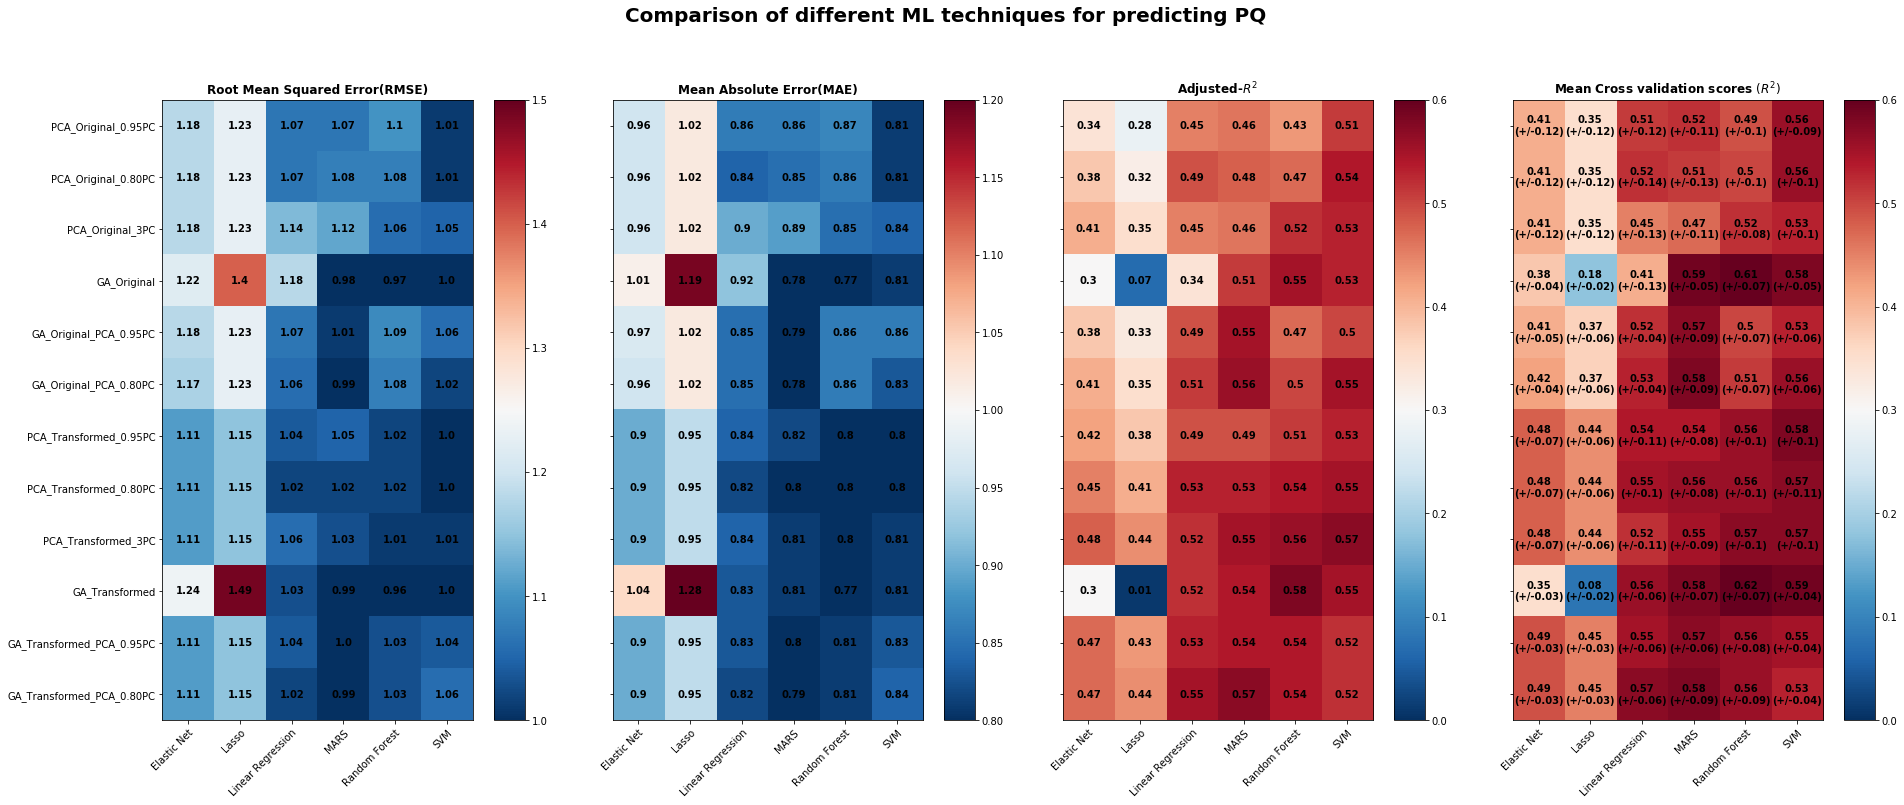

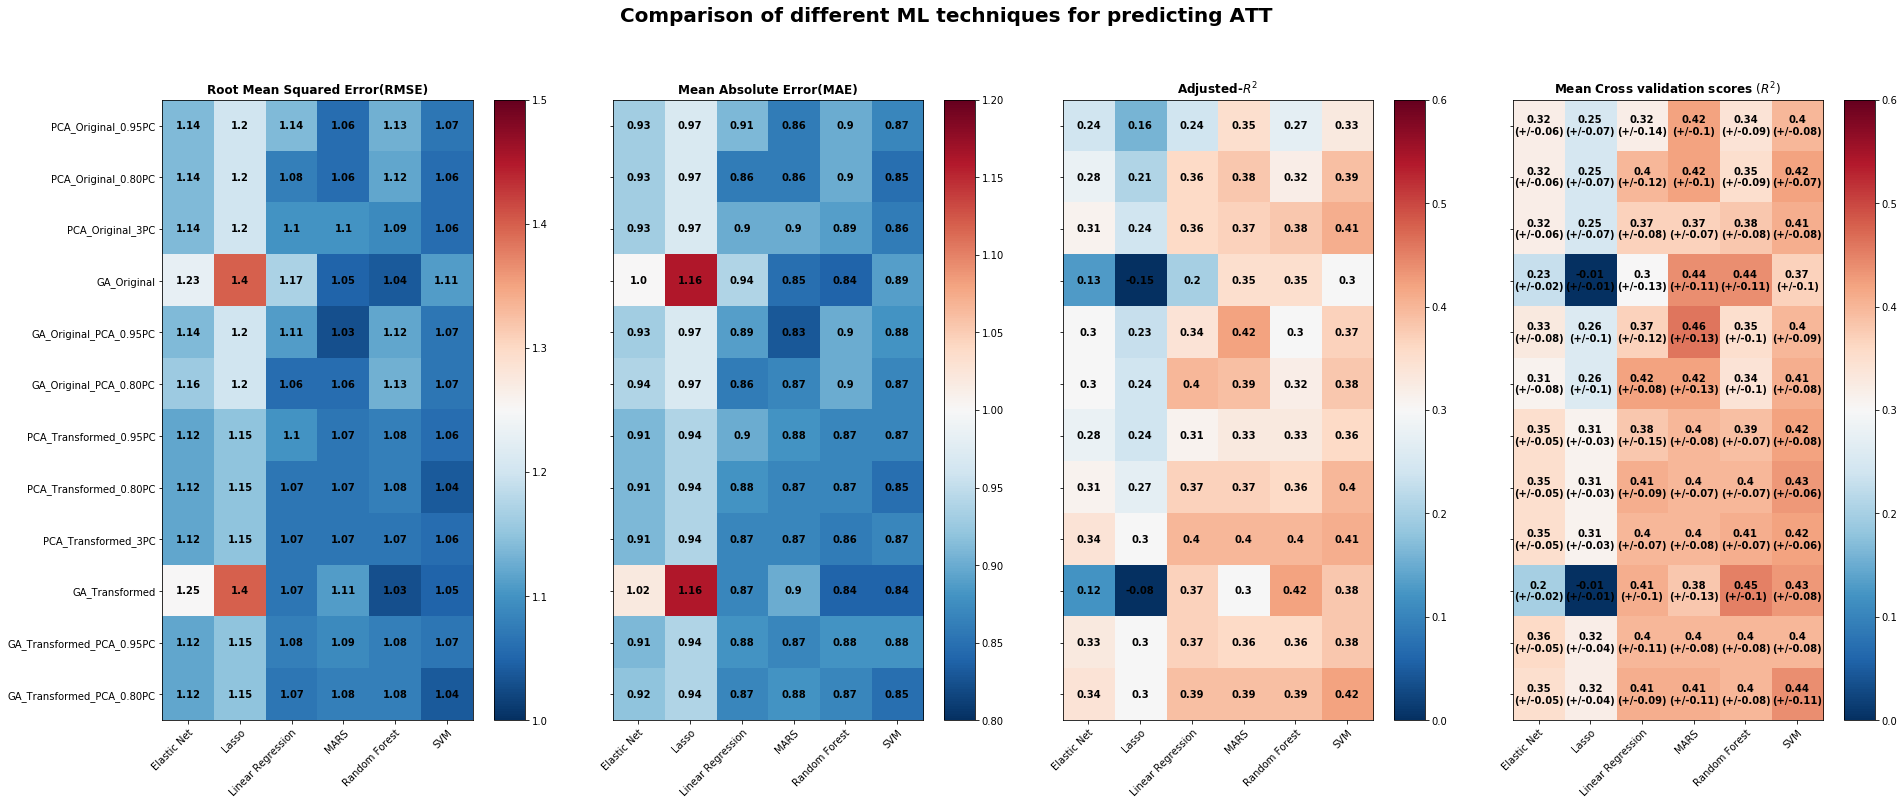

In [8]:
pathsArr=[
'study2_PCA_alltargets_mahalanobis_0.95PC.csv',
    'study2_PCA_alltargets_mahalanobis_0.80PC.csv',
         'study2_PCA_alltargets_mahalanobis_3PC.csv',
    
        'study2_feature_selection_mahalanobis_alltargets.csv',
    'study2_feature_selection_mahalanobis_alltargets_PCA_0.95PC.csv',
         'study2_feature_selection_mahalanobis_alltargets_PCA_0.80PC.csv',
    
    'study2_PCA_alltargets_mahalanobis_transformed_0.95PC.csv',
    'study2_PCA_alltargets_mahalanobis_transformed_0.80PC.csv',
         'study2_PCA_alltargets_mahalanobis_transformed_3PC.csv',
    
         'study2_feature_selection_mahalanobis_transformed_alltargets.csv',
    'study2_feature_selection_mahalanobis_transformed_alltargets_PCA_0.95PC.csv',
         'study2_feature_selection_mahalanobis_transformed_alltargets_PCA_0.80PC.csv'
]

methods = ["PCA_Original_0.95PC", 
           "PCA_Original_0.80PC", 
           "PCA_Original_3PC",
               
           "GA_Original",
           "GA_Original_PCA_0.95PC",
              "GA_Original_PCA_0.80PC",
           
           "PCA_Transformed_0.95PC", 
           "PCA_Transformed_0.80PC", 
           "PCA_Transformed_3PC",
           
               "GA_Transformed",
           "GA_Transformed_PCA_0.95PC",
           "GA_Transformed_PCA_0.80PC"
              ]
models=['Elastic Net', 'Lasso', 'Linear Regression',
           'MARS',
            'Random Forest','SVM']

target='PQ'
generate_heatmap_forall(pathsArr,target,methods,models)

target='ATT'
generate_heatmap_forall(pathsArr,target,methods,models)